In [1]:
## Some basic imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
## Loading the dataset

dataset = pd.read_csv("../parcelData/perfect.csv")

In [3]:
dataset = pd.get_dummies(dataset, columns=['city'], prefix='city')
dataset = pd.get_dummies(dataset, columns=['usedesc'], prefix="useDesc")
print(dataset)

      ll_gissqft  ll_gisacre    landval    parval  city_Dallas  \
0          15916     0.36537    40000.0    193080            1   
1          12762     0.29297    63790.0    276580            1   
2           8085     0.18559    35000.0    147410            1   
3           7220     0.16575    25000.0    103660            1   
4           9004     0.20670    22500.0    130710            1   
...          ...         ...        ...       ...          ...   
1659       14263     0.32743  1456560.0   2262870            0   
1660       94676     2.17341  7358249.0  13717878            0   
1661       18682     0.42886  1664640.0   2809080            0   
1662       23281     0.53445  1414008.0   2676515            0   
1663       18083     0.41512  1388758.0   2083135            0   

      city_Philadelphia  city_Socal  useDesc_Commercial  \
0                     0           0                   0   
1                     0           0                   0   
2                     0       

In [66]:
print(dataset.columns)

Index(['ll_gissqft', 'll_gisacre', 'landval', 'parval', 'city_Dallas',
       'city_Philadelphia', 'city_Socal', 'useDesc_Commercial',
       'useDesc_Commercial Office Buildings',
       'useDesc_Commercial Store Combination',
       'useDesc_Industrial Warehousing', 'useDesc_None', 'useDesc_Residential',
       'useDesc_Residential Single'],
      dtype='object')


In [4]:
X = dataset.loc[:, dataset.columns != 'landval']
y = dataset['landval']

print(X.shape)

(1664, 13)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [6]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train)
X_test = s_scaler.transform(X_test)

In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

TypeError: LinearRegression.fit() got an unexpected keyword argument 'callbacks'

In [8]:
print(regressor.intercept_)
print(regressor.coef_)

263674.71801244287
[ 1.96704462e+09 -1.96709463e+09  1.41912845e+06 -3.71513443e+18
 -2.71099377e+18  1.94625719e+18  5.30702864e+18 -4.57280219e+16
 -4.57280219e+16 -3.87923587e+17  8.44190360e+18  8.37543789e+18
 -1.81938626e+17]


In [9]:
y_pred = regressor.predict(X_test)

In [11]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
288,127400.0,34218.718012
1205,90000.0,165802.718012
1168,93750.0,82858.718012
758,26070.0,-4693.281988
489,40000.0,29610.718012
1124,135000.0,157610.718012
134,62730.0,113578.718012
1221,93750.0,132010.718012
1216,45000.0,-13909.281988
1498,15620.0,22442.718012


In [12]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 57472.45943331857
MSE: 19752851955.29233
RMSE: 140544.83966084395
VarScore: 0.904876473553183


In [47]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [60]:
# having 19 neuron is based on the number of available features
model = Sequential()
model.add(Dense(16,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dropout(.3, input_shape=(19,)))
model.add(Dense(19,activation='relu'))
model.add(Dropout(.3, input_shape=(19,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [61]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=16,epochs=20)
model.summary()

Epoch 1/20
89/89 [==============================] - 2s 4ms/step - loss: 2374737068032.0000 - val_loss: 222214930432.0000
Epoch 2/20
89/89 [==============================] - 0s 2ms/step - loss: 2374736281600.0000 - val_loss: 222214471680.0000
Epoch 3/20
89/89 [==============================] - 0s 2ms/step - loss: 2374731038720.0000 - val_loss: 222210637824.0000
Epoch 4/20
89/89 [==============================] - 0s 2ms/step - loss: 2374690668544.0000 - val_loss: 222179524608.0000
Epoch 5/20
89/89 [==============================] - 0s 2ms/step - loss: 2374499827712.0000 - val_loss: 222057037824.0000
Epoch 6/20
89/89 [==============================] - 0s 2ms/step - loss: 2373480873984.0000 - val_loss: 221629562880.0000
Epoch 7/20
89/89 [==============================] - 0s 2ms/step - loss: 2370872016896.0000 - val_loss: 220717137920.0000
Epoch 8/20
89/89 [==============================] - 0s 3ms/step - loss: 2366996217856.0000 - val_loss: 219290697728.0000
Epoch 9/20
89/89 [==============

<AxesSubplot: >

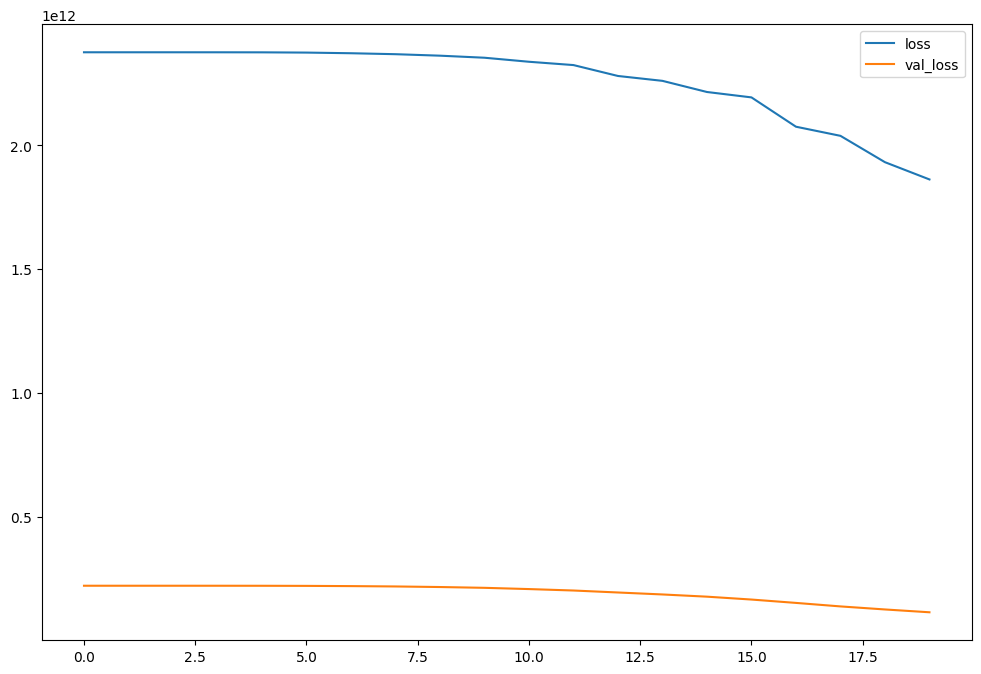

In [62]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

8/8 [==============================] - 0s 1ms/step
MAE: 77387.0535625
MSE: 115115242221.96
RMSE: 339286.3719956344
VarScore: 0.44554639836458965


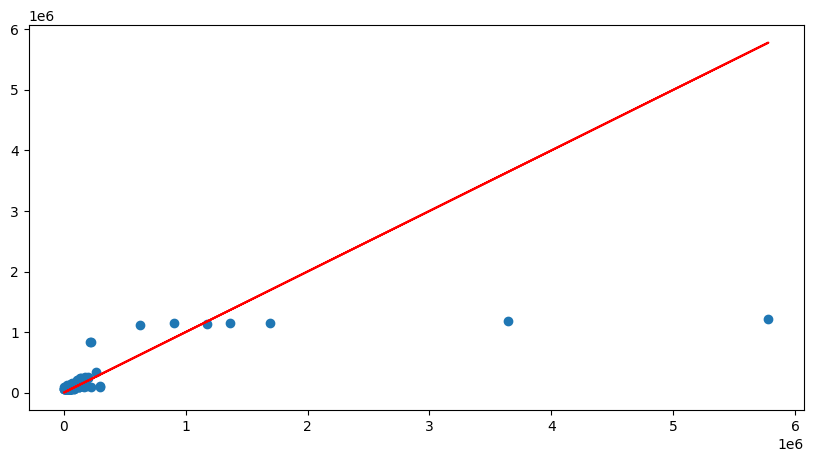

In [63]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')